# Importing the necessary libraries 

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [3]:
data=pd.read_excel('API_2_DS2_en_excel_v2_4357603.xls',sheet_name='Data')
countries_metadata=pd.read_excel('API_2_DS2_en_excel_v2_4357603.xls',sheet_name='Metadata - Countries')
indicators_metadata=pd.read_excel('API_2_DS2_en_excel_v2_4357603.xls',sheet_name='Metadata - Indicators')

# Merging the Data from the all the sheets based on common columns 

In [4]:
data_countries=pd.merge(countries_metadata,data,how='inner',on='Country Code')

In [5]:
complete_data=pd.merge(data_countries,indicators_metadata,how='inner',left_on='Indicator Code',right_on='INDICATOR_CODE')

In [6]:
complete_data.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Country Name', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', 'INDICATOR_CODE',
       'INDICATOR_NAME', 'SOURCE_NOTE', 'SOURCE_ORGANIZATION'],
      dtype='object')

In [7]:
indicators_metadata

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SM.POP.NETM,Net migration,Net migration is the net total of migrants dur...,United Nations Population Division. World Popu...
1,SL.EMP.VULN.ZS,"Vulnerable employment, total (% of total emplo...",Vulnerable employment is contributing family w...,Derived using data from International Labour O...
2,SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 P...,Poverty headcount ratio at $1.90 a day is the ...,"World Bank, Poverty and Inequality Platform. D..."
3,SI.DST.FRST.20,Income share held by lowest 20%,Percentage share of income or consumption is t...,"World Bank, Poverty and Inequality Platform. D..."
4,SH.TBS.INCD,"Incidence of tuberculosis (per 100,000 people)",Incidence of tuberculosis is the estimated num...,"World Health Organization, Global Tuberculosis..."
...,...,...,...,...
69,DC.DAC.BELL.CD,"Net bilateral aid flows from DAC donors, Belgi...",Net bilateral aid flows from DAC donors are th...,Development Assistance Committee of the Organi...
70,DC.DAC.AUTL.CD,"Net bilateral aid flows from DAC donors, Austr...",Net bilateral aid flows from DAC donors are th...,Development Assistance Committee of the Organi...
71,DC.DAC.AUSL.CD,"Net bilateral aid flows from DAC donors, Austr...",Net bilateral aid flows from DAC donors are th...,Development Assistance Committee of the Organi...
72,BX.GRT.TECH.CD.WD,"Technical cooperation grants (BoP, current US$)",Technical cooperation grants include free-stan...,"World Bank, International Debt Statistics, and..."


In [8]:
### off all the indicators provided from indicator code
cols=['SM.POP.NETM','SL.EMP.VULN.ZS','SI.POV.DDAY','SI.DST.FRST.20','SH.TBS.INCD',
'SH.STA.STNT.ZS',
'SH.STA.MMRT',
'SH.STA.ANVC.ZS',
'SH.DYN.MORT',
'SH.DYN.AIDS.ZS',
'SE.PRM.CMPT.ZS',
'SE.ENR.PRSC.FM.ZS',
'BX.GRT.TECH.CD.WD']
Necesary_Indicators=indicators_metadata[indicators_metadata.INDICATOR_CODE.isin(cols)]

In [9]:
Necesary_Indicators

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SM.POP.NETM,Net migration,Net migration is the net total of migrants dur...,United Nations Population Division. World Popu...
1,SL.EMP.VULN.ZS,"Vulnerable employment, total (% of total emplo...",Vulnerable employment is contributing family w...,Derived using data from International Labour O...
2,SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 P...,Poverty headcount ratio at $1.90 a day is the ...,"World Bank, Poverty and Inequality Platform. D..."
3,SI.DST.FRST.20,Income share held by lowest 20%,Percentage share of income or consumption is t...,"World Bank, Poverty and Inequality Platform. D..."
4,SH.TBS.INCD,"Incidence of tuberculosis (per 100,000 people)",Incidence of tuberculosis is the estimated num...,"World Health Organization, Global Tuberculosis..."
5,SH.STA.STNT.ZS,"Prevalence of stunting, height for age (% of c...",Prevalence of stunting is the percentage of ch...,"UNICEF, WHO, World Bank: Joint child malnutrit..."
6,SH.STA.MMRT,"Maternal mortality ratio (modeled estimate, pe...",Maternal mortality ratio is the number of wome...,"WHO, UNICEF, UNFPA, World Bank Group, and the ..."
7,SH.STA.ANVC.ZS,Pregnant women receiving prenatal care (%),Pregnant women receiving prenatal care are the...,"UNICEF, State of the World's Children, Childin..."
8,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",Under-five mortality rate is the probability p...,Estimates developed by the UN Inter-agency Gro...
9,SH.DYN.AIDS.ZS,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,UNAIDS estimates.


In [10]:
complete_data=complete_data[complete_data['Indicator Code'].isin(cols)]

In [11]:
complete_data=complete_data.drop(['INDICATOR_CODE','INDICATOR_NAME','SOURCE_NOTE','SOURCE_ORGANIZATION','SpecialNotes','TableName'],axis=1)

In [12]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

pd.DataFrame(complete_data.isna().sum())


,0
Country Code,0
Region,624
IncomeGroup,637
Country Name,0
Indicator Name,0
Indicator Code,0
1960,3235
1961,3225
1962,2979
1963,3213


In [13]:
complete_data['Region']=complete_data['Region'].fillna('region_missing')
complete_data['IncomeGroup']=complete_data['IncomeGroup'].fillna('IncomeGroup_missing')


In [14]:
# for i in range(1960,2022):
#     complete_data[str(i)]=complete_data[str(i)].fillna(-1)

In [15]:
complete_data['IncomeGroup'].value_counts()

High income            1040
Lower middle income     702
Upper middle income     702
IncomeGroup_missing     637
Low income              364
Name: IncomeGroup, dtype: int64

In [16]:
sample=complete_data[complete_data['IncomeGroup']=='Low income'].fillna(-1)#.groupby(['Indicator Code'])["2021"]

In [17]:
pd.set_option('display.max_rows', 1000)

data=pd.DataFrame(sample[['Indicator Code','2020']].value_counts(),columns=['counts']).reset_index()

In [18]:
missing_codes=data[data['2020']==-1]['Indicator Code'].to_list()

In [19]:
set(cols)-set(missing_codes)

{'BX.GRT.TECH.CD.WD', 'SH.DYN.MORT', 'SH.TBS.INCD'}

In [20]:
new_sample=complete_data[(complete_data['IncomeGroup']=='Low income') & complete_data['Indicator Code'].isin(['BX.GRT.TECH.CD.WD', 'SH.DYN.MORT', 'SH.TBS.INCD'])]

In [21]:
new_sample.isna().sum()

Country Code       0
Region             0
IncomeGroup        0
Country Name       0
Indicator Name     0
Indicator Code     0
1960              49
1961              48
1962              45
1963              44
1964              42
1965              42
1966              40
1967              39
1968              38
1969              36
1970              37
1971              37
1972              36
1973              35
1974              34
1975              34
1976              34
1977              34
1978              34
1979              34
1980              34
1981              34
1982              33
1983              33
1984              33
1985              30
1986              30
1987              30
1988              30
1989              30
1990              30
1991              30
1992              30
1993              29
1994              29
1995              29
1996              29
1997              29
1998              29
1999              29
2000               2
2001         

In [22]:
TB_issue=new_sample[(new_sample['Indicator Code']=='SH.TBS.INCD')][['Country Name','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]

In [23]:
TB_managing_countries=TB_issue['Country Name'].to_list()

In [24]:
TB_issue

#new_sample[['Country Name','2011']].plot(kind='line')#,'2012','2013','2014','2015','2016','2017','2018','2019','2020']]

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1062,Afghanistan,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,193.0
1076,Burundi,138.0,133.0,128.0,126.0,122.0,118.0,114.0,111.0,107.0,103.0
1079,Burkina Faso,57.0,55.0,54.0,54.0,52.0,51.0,49.0,48.0,47.0,46.0
1094,Central African Republic,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0,540.0
1103,"Congo, Dem. Rep.",327.0,327.0,326.0,325.0,324.0,323.0,322.0,321.0,320.0,319.0
1129,Eritrea,157.0,160.0,144.0,119.0,102.0,108.0,99.0,89.0,86.0,81.0
1132,Ethiopia,253.0,239.0,224.0,207.0,192.0,177.0,164.0,151.0,140.0,132.0
1145,Guinea,183.0,180.0,177.0,177.0,177.0,176.0,176.0,176.0,176.0,179.0
1146,"Gambia, The",178.0,177.0,176.0,175.0,173.0,170.0,166.0,162.0,158.0,157.0
1147,Guinea-Bissau,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0


In [25]:
TB_issue.columns

Index(['Country Name', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')

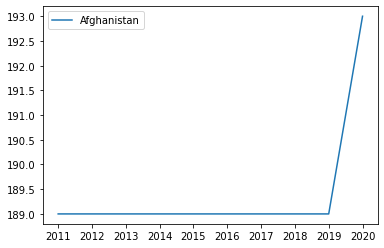

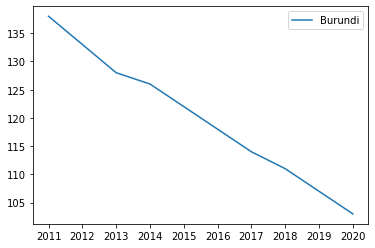

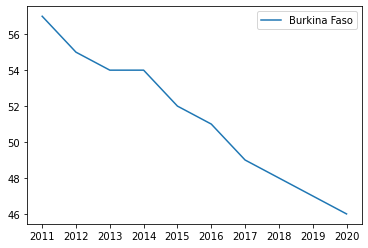

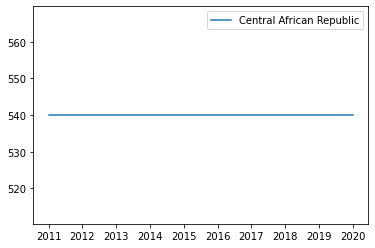

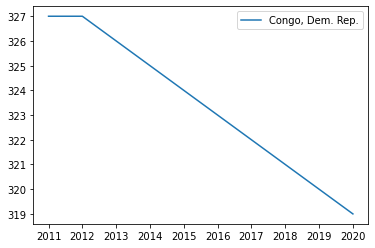

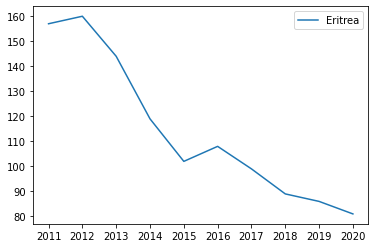

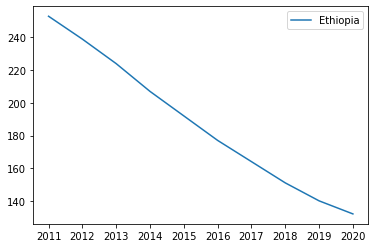

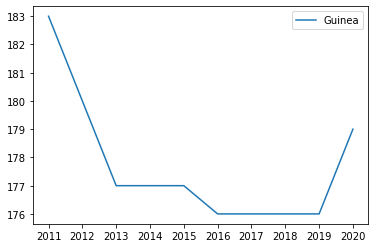

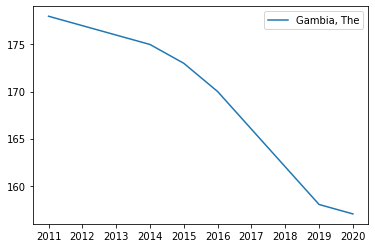

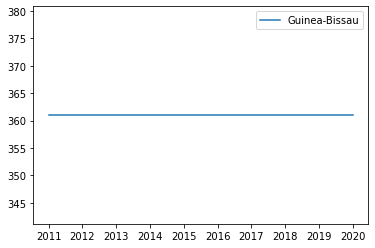

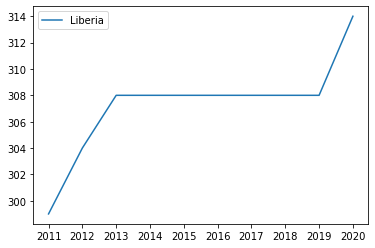

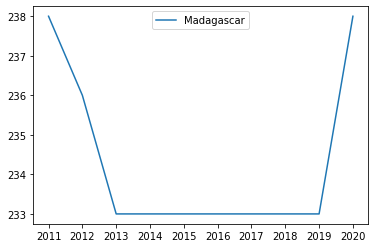

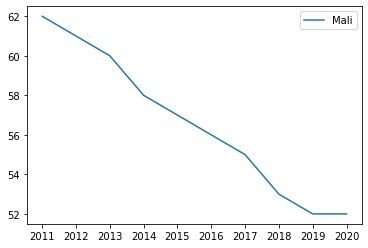

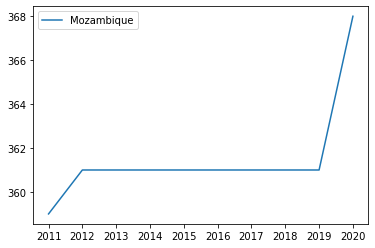

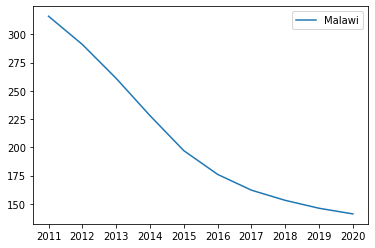

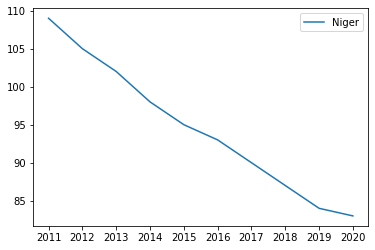

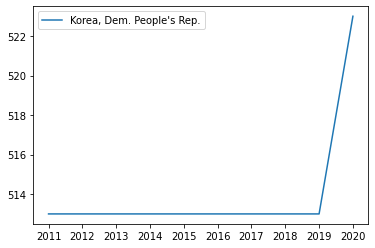

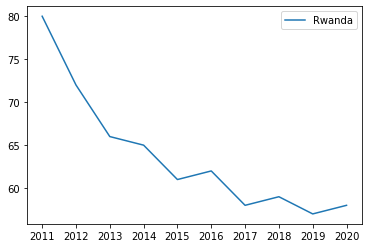

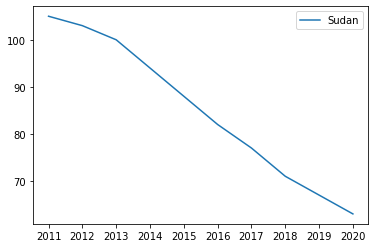

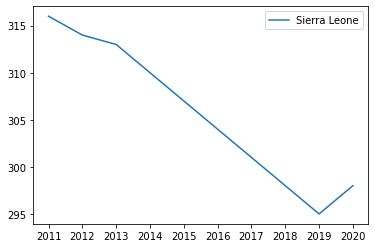

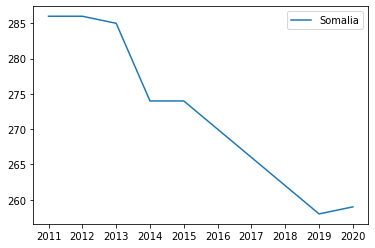

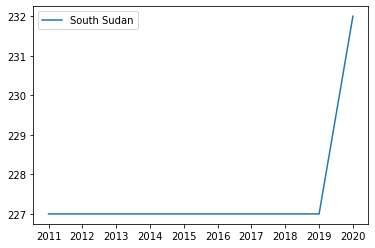

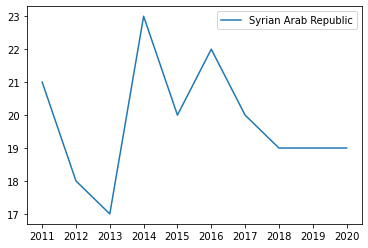

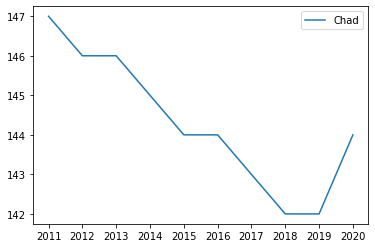

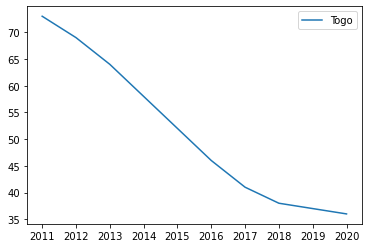

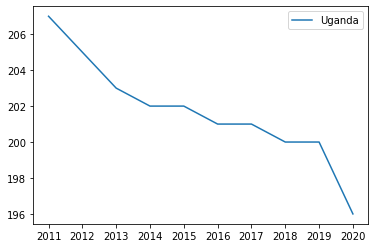

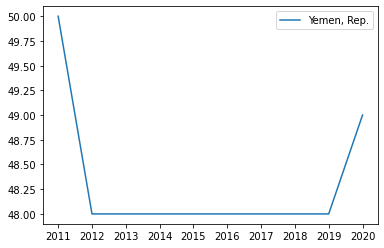

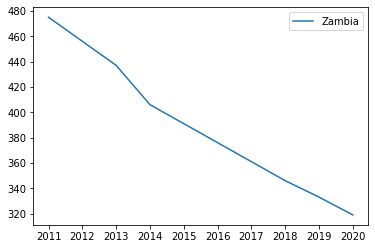

In [26]:
import matplotlib.pyplot as plt
TB_issue = TB_issue.set_index('Country Name')

for index, row in TB_issue.iterrows():
    plt.plot(row, label=index)
    plt.legend()
    plt.show()


In [27]:
mortality_under_5=new_sample[new_sample['Indicator Code']=='SH.DYN.MORT'][['Country Name','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]

In [28]:
mortality_under_5_countries=mortality_under_5['Country Name'].to_list()

In [29]:
mortality_under_5.set_index('Country Name')

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,
Afghanistan,84.0,80.3,76.9,73.6,70.4,67.5,64.8,62.3,60.1,58.0
Burundi,85.5,80.3,75.5,71.3,67.6,64.4,61.5,59.0,56.6,54.4
Burkina Faso,116.9,112.5,108.3,104.5,100.9,97.5,94.1,90.8,87.8,85.0
Central African Republic,140.5,136.2,132.5,128.2,123.3,118.2,114.5,111.1,106.6,103.0
"Congo, Dem. Rep.",109.9,106.1,102.5,99.2,95.9,92.8,89.6,86.6,83.8,81.2
Eritrea,53.1,51.2,49.5,47.9,46.3,44.8,43.3,41.9,40.6,39.3
Ethiopia,77.7,73.5,69.6,65.9,62.4,59.0,55.9,53.2,50.8,48.7
Guinea,115.3,113.0,110.7,109.2,107.3,104.6,102.6,100.4,98.0,95.6
"Gambia, The",70.6,67.7,65.0,62.4,59.8,57.4,55.1,53.1,51.2,49.4


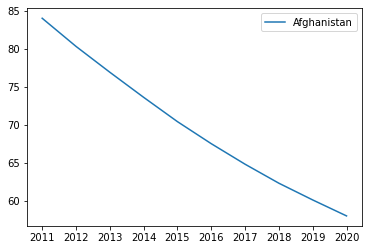

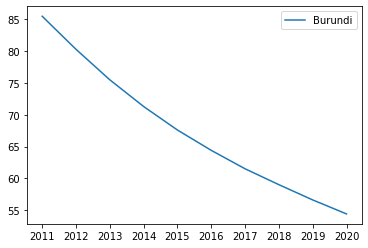

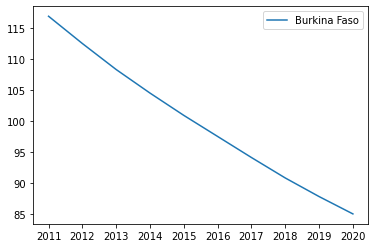

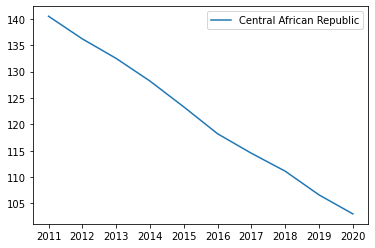

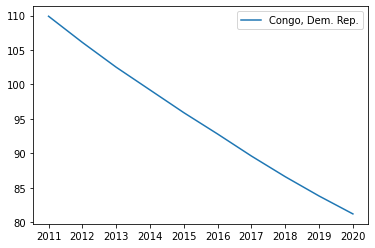

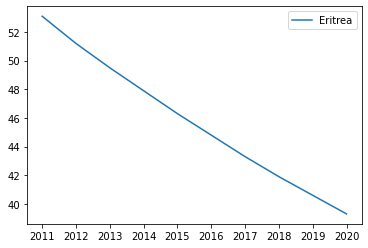

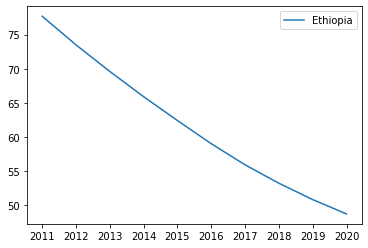

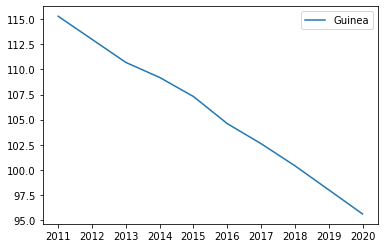

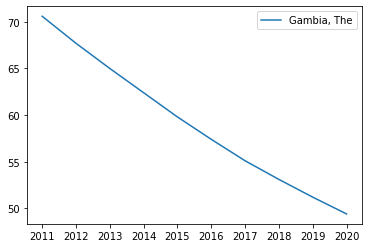

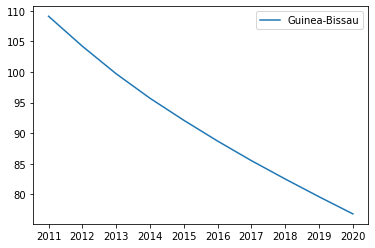

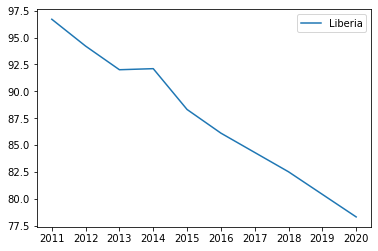

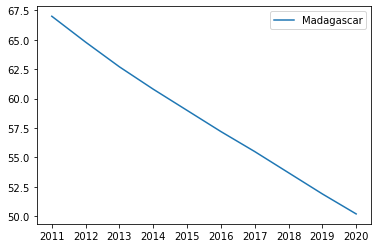

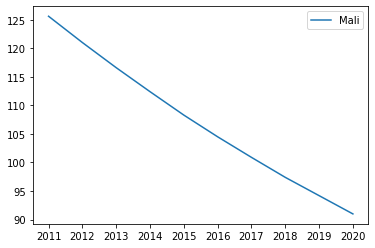

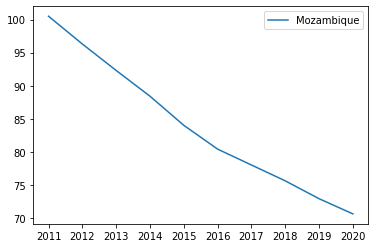

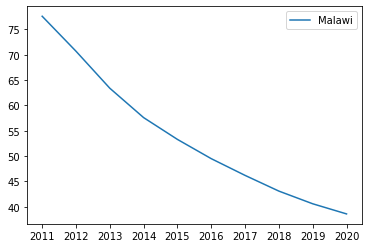

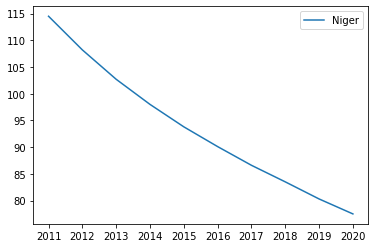

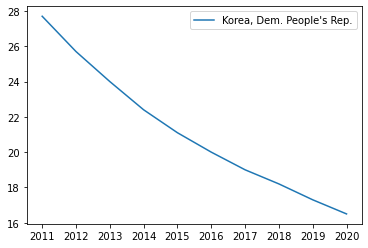

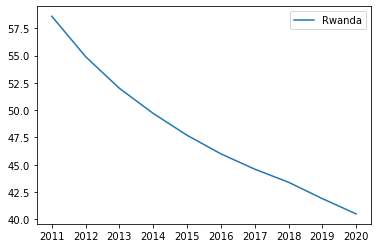

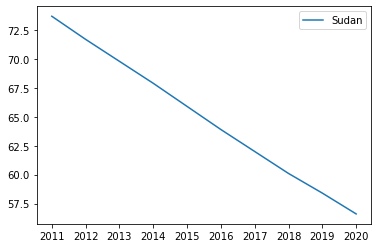

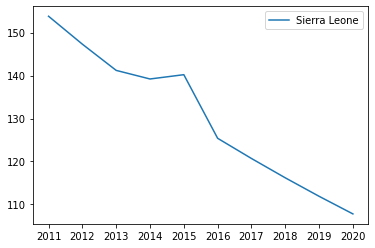

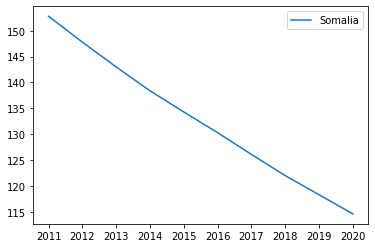

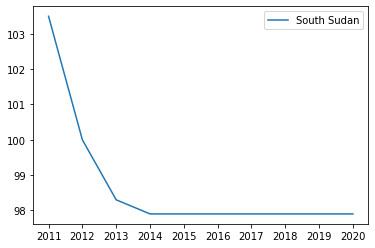

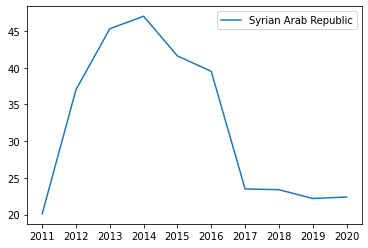

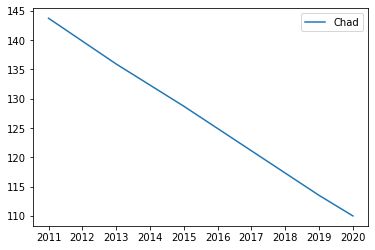

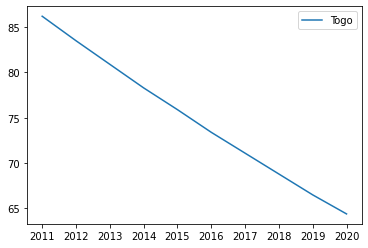

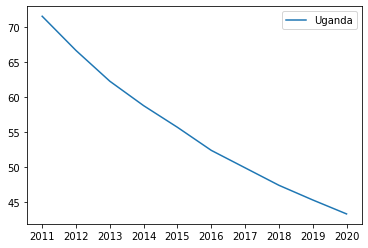

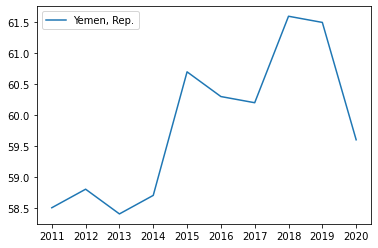

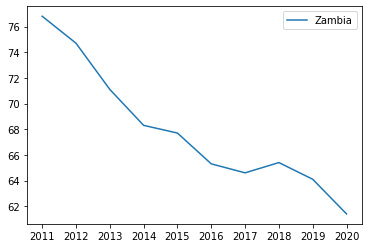

In [30]:
import matplotlib.pyplot as plt
mortality_under_5 = mortality_under_5.set_index('Country Name')

for index, row in mortality_under_5.iterrows():
    plt.plot(row, label=index)
    plt.legend()
    plt.show()

In [31]:
tech_grants=new_sample[new_sample['Indicator Code']=='BX.GRT.TECH.CD.WD'][['Country Name','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]

In [32]:
tech_grants_countries=tech_grants['Country Name'].to_list()

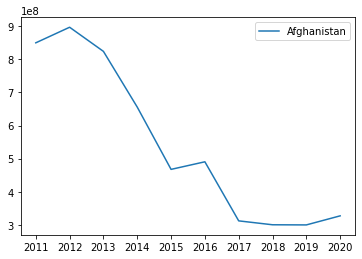

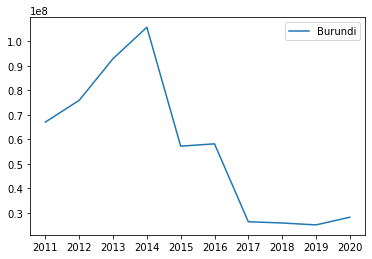

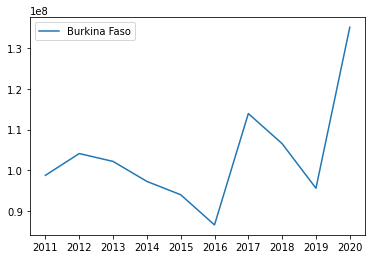

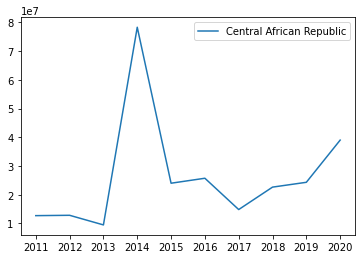

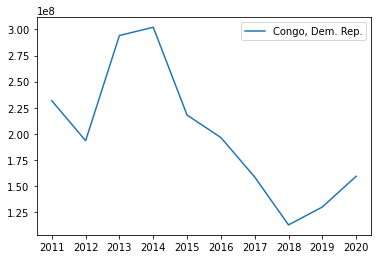

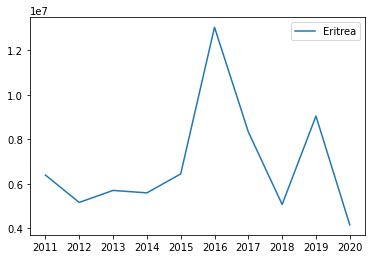

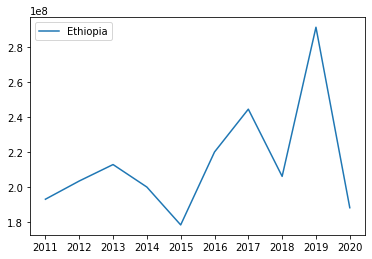

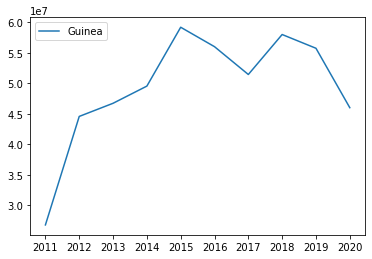

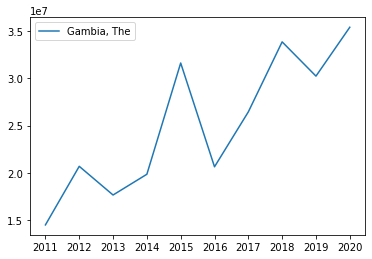

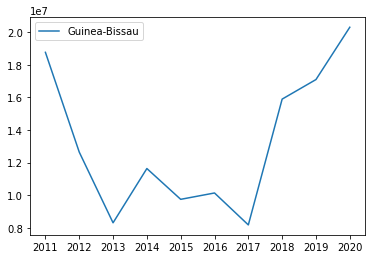

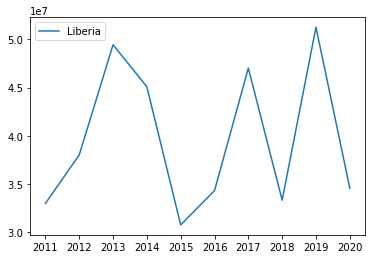

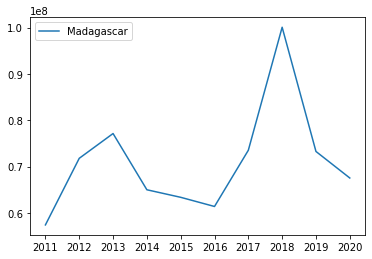

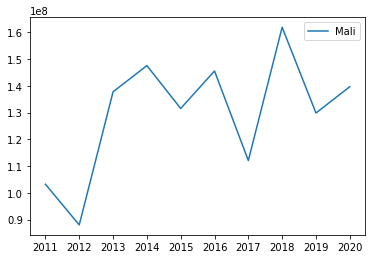

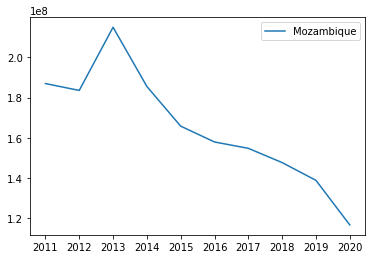

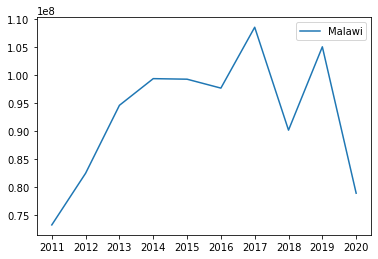

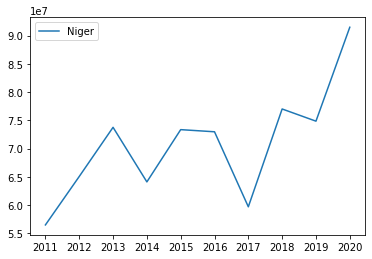

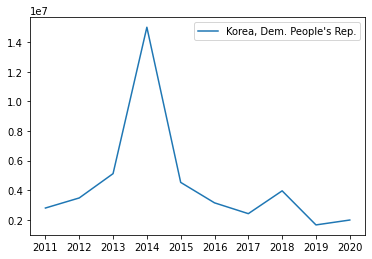

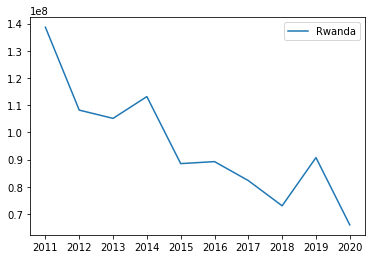

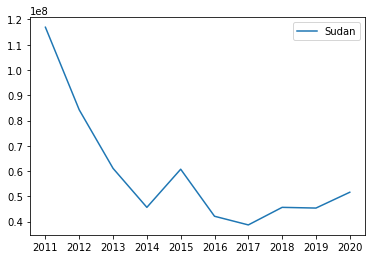

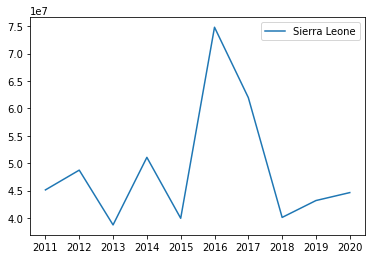

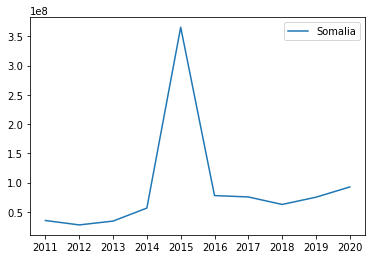

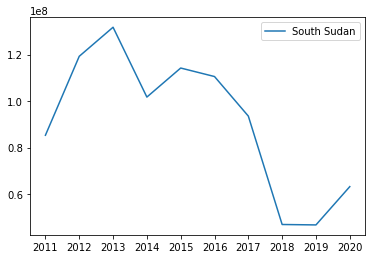

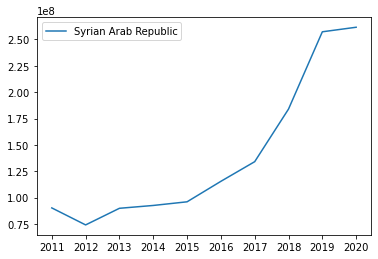

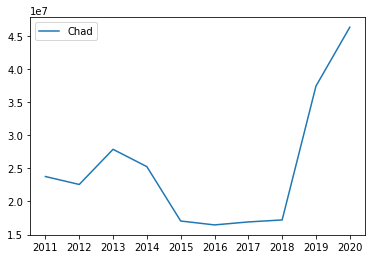

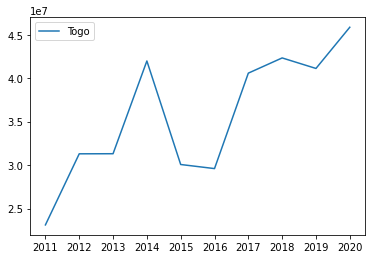

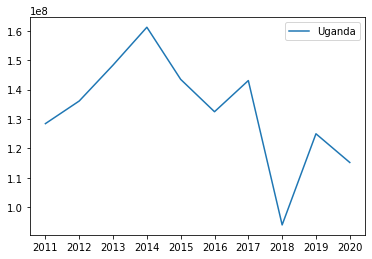

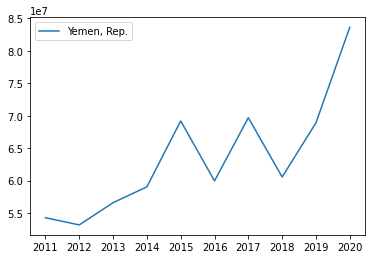

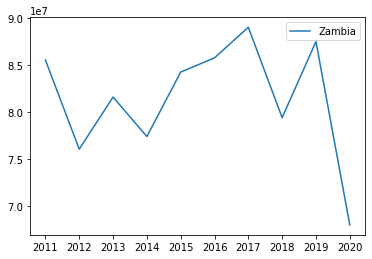

In [33]:
tech_grants = tech_grants.set_index('Country Name')

for index, row in tech_grants.iterrows():
    plt.plot(row, label=index)
    plt.legend()
    plt.show()

In [34]:
set(mortality_under_5_countries) & set(TB_managing_countries)& set(tech_grants_countries)

{'Afghanistan',
 'Burkina Faso',
 'Burundi',
 'Central African Republic',
 'Chad',
 'Congo, Dem. Rep.',
 'Eritrea',
 'Ethiopia',
 'Gambia, The',
 'Guinea',
 'Guinea-Bissau',
 "Korea, Dem. People's Rep.",
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mozambique',
 'Niger',
 'Rwanda',
 'Sierra Leone',
 'Somalia',
 'South Sudan',
 'Sudan',
 'Syrian Arab Republic',
 'Togo',
 'Uganda',
 'Yemen, Rep.',
 'Zambia'}

<AxesSubplot:xlabel='Country Name'>

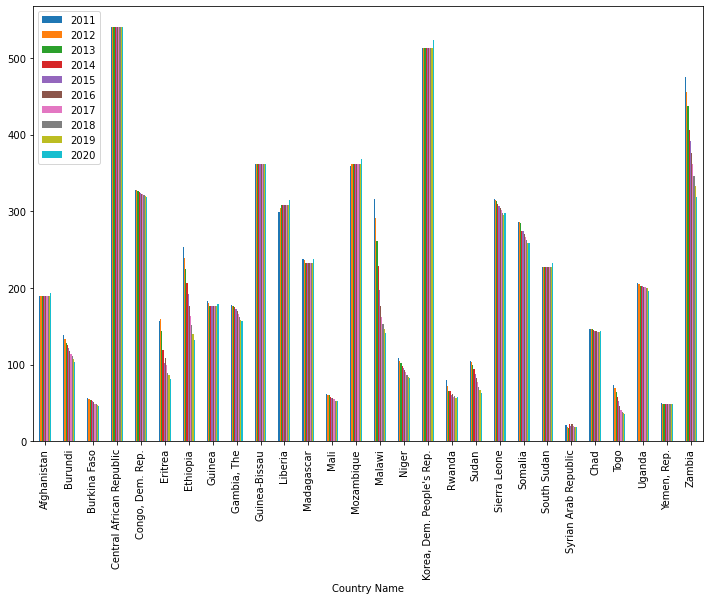

In [35]:
###For low income countries there are lots of issues.
### The problem statement is to identify the ones that need to have the medical equipment.
##giving the medical equipment does not solve the problem, it needs more efforts from countries, to maintain
###the given aid if not the equipment will be left in that state without much use
## to come to conclusion on the countries that needed the medical equipment
##the countries are identified on their management of issues like 
#1.tuberculosis management in the last decade
#2. Mortality of babies under 5 years
#3.Grant from country government on training related to management of tech



TB_issue.plot(kind='bar',figsize=(12,8))


<AxesSubplot:xlabel='Country Name'>

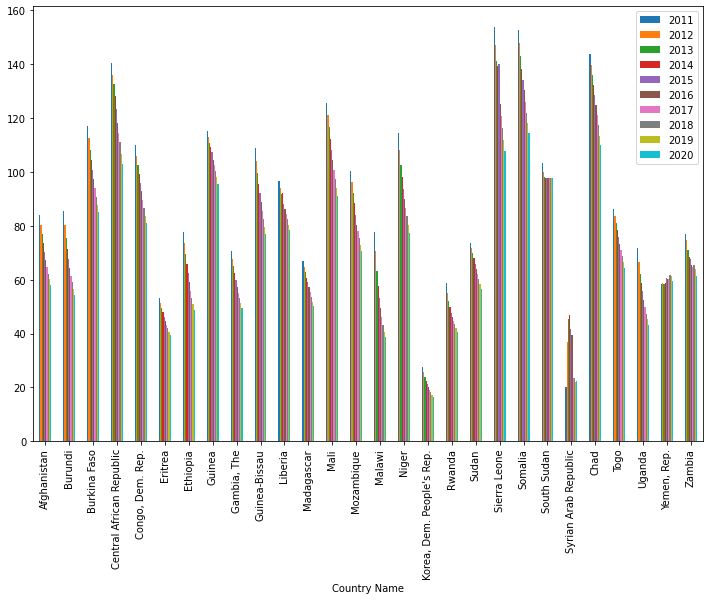

In [36]:
mortality_under_5.plot(kind='bar',figsize=(12,8))

<AxesSubplot:xlabel='Country Name'>

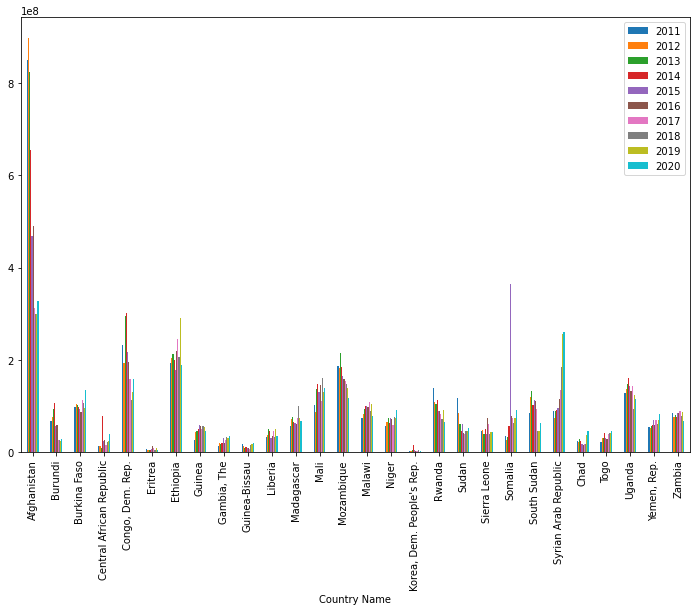

In [37]:
tech_grants.plot(kind='bar',figsize=(12,8))

In [38]:
###out of all the countries afghanistan seems to be working on training the technical expertise,
###but since the turmoil it is expected to spend less in the next years
##country malawi ethiopia are able to get better results without much spending on technical trainings
##to set the priority among the two countries 
##we need to see the which countries forecast looks better in 2021 with the country that needs the equipment
## usually where the chances of sickness is more.

In [39]:

###since the data availability is very less for tuberculosis the data is not considered for time series modeling
##

In [40]:
#mortality rate case

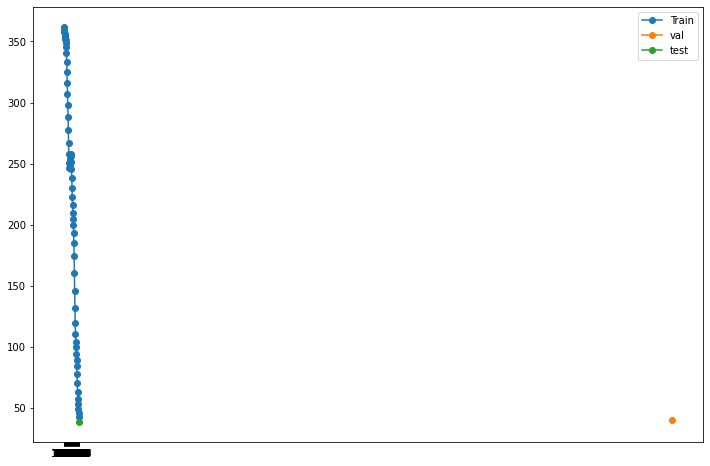

In [41]:
malawi_data_mr=complete_data[(complete_data['Country Name']=='Malawi') &(complete_data['Indicator Code']=='SH.DYN.MORT')]
needed_list=[]
for i in range(1960,2021):
    needed_list.append(str(i))
malawi_data=malawi_data_mr[needed_list].T.dropna()
ts=malawi_data


split_idx = '2018'
split_idx

# Split
train = ts.loc[:str(split_idx)]
val = ts.loc[str(int(split_idx)+1)]
test=ts.loc[str(int(split_idx)+2):]
# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(val, label='val', **kws)
plt.plot(test,label='test',**kws)
ax.legend(bbox_to_anchor=[1,1]);

In [42]:
model = pm.auto_arima(train, start_p=0, start_q=0,seasonal=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 -75.182
Date:                Thu, 11 Aug 2022   AIC                            158.364
Time:                        08:20:03   BIC                            166.536
Sample:                             0   HQIC                           161.540
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8108      0.311     -2.606      0.009      -1.421      -0.201
ar.L1          1.6731      0.066     25.409      0.000       1.544       1.802
ar.L2         -0.8171      0.077    -10.619      0.000      -0.968      -0.666
sigma2         0.7622      0.132      5.754      0.000       0.503       1.022
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.48   Prob(JB):                         0.72
Heteroskedasticity (H):               2.12   Skew:                            -0.11
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Viswak Raj\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


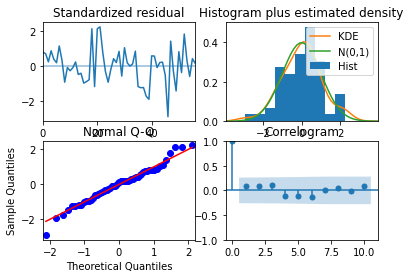

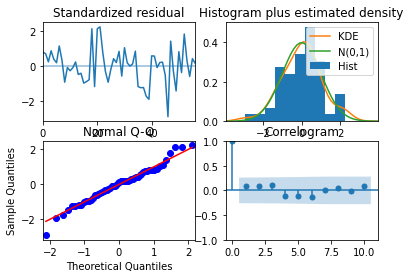

In [43]:
model.plot_diagnostics()

In [44]:
print('predicted for 2019,2020',model.predict(2))
print('actual value for 2019',val.values)
print('actual value for 2020',test.values)

predicted for 2019,2020 [39.79904702 35.99846237]
actual value for 2019 [40.6]
actual value for 2020 [[38.6]]


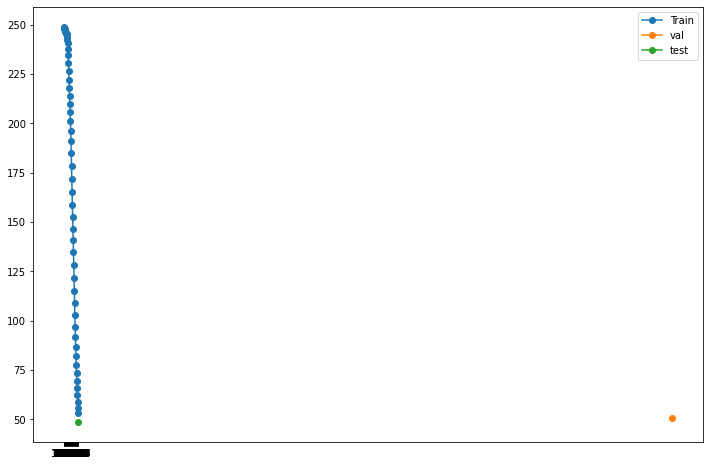

In [45]:
###let us check for ethiopia case about the mortality of children below 5 years


ethiopia_data_mr=complete_data[(complete_data['Country Name']=='Ethiopia') &(complete_data['Indicator Code']=='SH.DYN.MORT')]
needed_list=[]
for i in range(1960,2021):
    needed_list.append(str(i))
ethiopia_data=ethiopia_data_mr[needed_list].T.dropna()
ts=ethiopia_data


split_idx = '2018'
split_idx

# Split
train = ts.loc[:str(split_idx)]
val = ts.loc[str(int(split_idx)+1)]
test=ts.loc[str(int(split_idx)+2):]
# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(val, label='val', **kws)
plt.plot(test,label='test',**kws)
ax.legend(bbox_to_anchor=[1,1]);

In [46]:
train

,2192
1966,249.0
1967,248.5
1968,247.9
1969,247.6
1970,247.1
1971,246.7
1972,246.3
1973,246.0
1974,245.9
1975,245.6


In [47]:
model = pm.auto_arima(train, start_p=0, start_q=0,seasonal=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(1, 2, 0)   Log Likelihood                   9.044
Date:                Thu, 11 Aug 2022   AIC                            -14.088
Time:                        08:20:07   BIC                            -10.224
Sample:                             0   HQIC                           -12.611
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7798      0.092      8.469      0.000       0.599       0.960
sigma2         0.0403      0.009      4.536      0.000       0.023       0.058
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.59   Prob(JB):                         0.17
Heteroskedasticity (H):               0.46   Skew:                            -0.61
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Viswak Raj\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


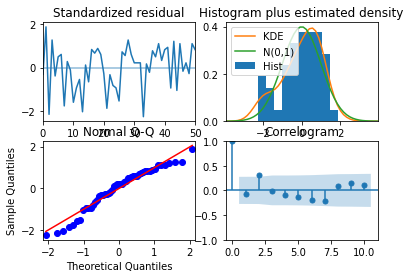

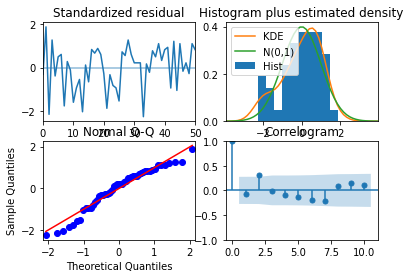

In [48]:
model.plot_diagnostics()

In [49]:
print('predicted for 2019,2020',model.predict(2))
print('actual value for 2019',val.values)
print('actual value for 2020',test.values)

predicted for 2019,2020 [50.811904   48.66701826]
actual value for 2019 [50.8]
actual value for 2020 [[48.7]]


In [50]:
###much reduction is seen in the case of malawa rather than the Ethiopia since the model is tending towards
##malawa it may further reduce the issues and betters the health of child below 5,which is a major issue
##we should pick malawa in case of prioritization.
